<a href="https://colab.research.google.com/github/mckenzie-maidl/data5100-climate-agriculture/blob/main/Climate_Data_Cleaning_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning Notebook

In [ ]:
!pip install fancyimpute -q

     |████████████████████████████████| 154 kB 8.4 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns 

# Plot missing values
import missingno as msno

# Model
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from numpy import nan as NA

#imports imputers
from fancyimpute import KNN
from fancyimpute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

## Climate


In [ ]:
#monthly average temperatures
file_names = ['53005%20Benton-%20Monthly%20AVG%20Temp.csv', '53009%20Clallam-%20Monthly%20AVG%20Temp.csv', '53011%20Clark%20-%20Monthly%20Avg%20Temp.csv', 
              '53013%20Columbia%20-%20Monthly%20AVG%20Temp.csv', '53015%20Cowlitz%20-%20Monthly%20Avg%20Temp.csv', '53017%20Douglas%20-%20Monthly%20Avg%20Temp.csv',
              '53019%20Ferry%20-%20Monthly%20Avg%20Temp.csv', '53021%20Franklin%20-%20Monthly%20Avg%20Temp.csv', '53025%20Grant%20-%20Monthly%20Avg%20Temp.csv',
              '53027%20Grays%20Harbor%20-%20Monthly%20Avg%20Temp.csv', '53029%20Island%20-%20Monthly%20Avg%20Temp.csv', '53031%20Jefferson%20-%20Monthly%20Avg%20Temp.csv',
              '53033%20King%20-%20Monthly%20Avg%20Temp.csv', '53035%20Kitsap%20-%20Monthly%20Avg%20Temp.csv', '53037%20Kittitas%20-%20Monthly%20Avg%20Temp.csv',
              '53039%20Klickitat%20-%20Monthly%20Avg%20Temp.csv', '53041%20Lewis%20-%20Monthly%20Avg%20Temp.csv', '53043%20Lincoln%20-%20Monthly%20Avg%20Temp.csv',
              '53045%20Mason%20-%20Monthly%20Avg%20Temp.csv','53047%20Okanogan%20-%20Monthly%20Avg%20Temp.csv', '53049%20Pacific%20-%20Monthly%20Avg%20Temp.csv',
              '53051%20Pend%20Oreille%20-%20Monthly%20Avg%20Temp.csv', '53053%20Pierce%20-%20Monthly%20Avg%20Temp.csv', '53055%20San%20Juan%20-%20Monthly%20Avg%20Temp.csv',
              '53057%20Skagit%20-%20Monthly%20Avg%20Temp.csv', '53059%20Skamania%20-%20Monthly%20Avg%20Temp.csv', '53061%20Snohomish%20-%20Monthly%20Avg%20Temp.csv',
              '53063%20Spokane%20-%20Monthly%20Avg%20Temp.csv', '53065%20Stevens%20-%20Monthly%20Avg%20Temp.csv', '53067%20Thurston%20-%20Monthly%20Avg%20Temp.csv',
              '53069%20Walla%20Walla%20-Monthly%20Avg%20Temp.csv', '53073%20Whatcom%20-Monthly%20Avg%20Temp.csv', '53075%20Whitman%20-Monthly%20Avg%20Temp.csv',
              '53077%20Yakima%20-Monthly%20Avg%20Temp.csv']


average_temp = pd.read_csv('https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Raw%20Data/Monthly%20Avg%20Temp/53001%20Adams%20-%20Monthly%20AVG%20Temp.csv')

for name in file_names:
  f = pd.read_csv('https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Raw%20Data/Monthly%20Avg%20Temp/' + name)
  average_temp = pd.concat([average_temp, f])


In [ ]:
#montlhy highest temp
file_names = ['53005%20Benton%20-%20Monthly%20Highest%20Temp.csv', '53007%20Chelan%20-%20Monthly%20Highest%20Temp.csv', '53009%20Clallam%20-%20Monthly%20Highest%20Temp.csv',
              '53011%20Clark%20-%20Monthly%20Highest%20Temp.csv', '53013%20Columbia%20-%20Monthly%20Highest%20Temp.csv', '53015%20Cowlitz%20-%20Monthly%20Highest%20Temp.csv',
              '53017%20Douglas%20-%20Monthly%20Highest%20Temp.csv', '53019%20Ferry%20-%20Monthly%20Highest%20Temp.csv',
              '53021%20Franklin%20-%20Monthly%20Highest%20Temp.csv', '53025%20Grant%20-%20Monthly%20Highest%20Temp.csv', '53027%20Grays%20Harbor-%20Monthly%20Highest%20Temp.csv',
              '53029%20Island-%20Monthly%20Highest%20Temp.csv','53031%20Jefferson-%20Monthly%20Highest%20Temp.csv', '53033%20King-%20Monthly%20Highest%20Temp.csv',
              '53035%20Kitsap-%20Monthly%20Highest%20Temp.csv','53037%20Kittitas-%20Monthly%20Highest%20Temp.csv', '53039%20Klickitat-%20Monthly%20Highest%20Temp.csv',
              '53041%20Lewis%20-%20Monthly%20Highest%20Temp.csv', '53043%20Lincoln%20-%20Monthly%20Highest%20Temp.csv', '53045%20Mason%20-%20Monthly%20Highest%20Temp.csv',
              '53047%20Okanogan%20-%20Monthly%20Highest%20Temp.csv', '53049%20Pacific%20-%20Monthly%20Highest%20Temp.csv', '53051%20Pend%20Oreille%20-%20Monthly%20Highest%20Temp.csv',
              '53053%20Pierce%20-%20Monthly%20Highest%20Temp.csv']


highest_temp = pd.read_csv('https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Raw%20Data/Monthly%20Highest%20Temp/5100%20Adams%20-%20Monthly%20Highest%20Temp.csv')

for name in file_names:
  f = pd.read_csv('https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Raw%20Data/Monthly%20Highest%20Temp/' + name)
  highest_temp = pd.concat([highest_temp, f])

In [ ]:
#montlhy lowest temp
file_names = ['53005%20Benton%20-%20Monthly%20Lowest%20Temp.csv', '53007%20Chelan%20-%20Monthly%20Lowest%20Temp.csv', '53009%20Clallam%20-%20Monthly%20Lowest%20Temp.csv',
              '53011%20Clark%20-%20Monthly%20Lowest%20Temp.csv', '53013%20Columbia%20-%20Monthly%20Lowest%20Temp.csv', '53015%20Cowlitz%20-%20Monthly%20Lowest%20Temp.csv',
              '53017%20Douglas%20-%20Monthly%20Lowest%20Temp.csv', '53019%20Ferry%20-%20Monthly%20Lowest%20Temp.csv',
              '53021%20Franklin%20-%20Monthly%20Lowest%20Temp.csv', '53025%20Grant%20-%20Monthly%20Lowest%20Temp.csv', '53027%20Grays%20Harbor%20-%20Monthly%20Lowest%20Temp.csv',
              '53029%20Island%20-%20Monthly%20Lowest%20Temp.csv','53031%20Jefferson%20-%20Monthly%20Lowest%20Temp.csv', '53033%20King%20-%20Monthly%20Lowest%20Temp.csv',
              '53035%20Kitsap%20-%20Monthly%20Lowest%20Temp.csv','53037%20Kittitas%20-%20Monthly%20Lowest%20Temp.csv', '53039%20Klickitat%20-%20Monthly%20Lowest%20Temp.csv',
              '53041%20Lewis%20-%20Monthly%20Lowest%20Temp.csv', '53043%20Lincoln%20-%20Monthly%20Lowest%20Temp.csv', '53045%20Mason%20-%20Monthly%20Lowest%20Temp.csv',
              '53047%20Okanogan%20-%20Monthly%20Lowest%20Temp.csv', '53049%20Pacific%20-%20Monthly%20Lowest%20Temp.csv', '53051%20Pend%20Oreille%20-%20Monthly%20Lowest%20Temp.csv',
              '53053%20Pierce%20-%20Monthly%20Lowest%20Temp.csv']

lowest_temp = pd.read_csv('https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Raw%20Data/Monthly%20Lowest%20Temp/5100%20Adams%20-Monthly%20Lowest%20Temp.csv')

for name in file_names:
  f = pd.read_csv('https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Raw%20Data/Monthly%20Lowest%20Temp/' + name)
  lowest_temp = pd.concat([lowest_temp, f])

In [ ]:
#montlhy Precip
file_names = ['53003%20Asotin%20-%20Monthly%20Precip.csv', '53005%20Benton%20-%20Monthly%20Precip.csv', '53007%20Chelan%20-%20Monthly%20Precip.csv',
              '53009%20Clallam%20-%20Monthly%20Precip.csv', '53011%20Clark%20-%20Monthly%20Precip.csv', '53013%20Columbia%20-%20Monthly%20Precip.csv',
              '53015%20Cowlitz%20-%20Monthly%20Precip.csv', '53017%20Douglas%20-%20Monthly%20Precip.csv', '53019%20Ferry%20-%20Monthly%20Precip.csv',
              '53019%20Franklin%20-%20Monthly%20Precip.csv', '53023%20Garfield%20-%20Monthly%20Precip.csv', '53025%20Grant%20-%20Monthly%20Precip.csv',
              '53027%20Grays%20Harbor%20-%20Monthly%20Precip.csv', '53029%20Island%20-%20Monthly%20Precip.csv', '53031%20Jefferson%20-%20Monthly%20Precip.csv',
              '53033%20King%20-%20Monthly%20Precip.csv', '53035%20Kitsap%20-%20Monthly%20Precip.csv', '53037%20Kittitas%20-%20Monthly%20Precip.csv',
              '53039%20Klickitat%20-%20Monthly%20Precip.csv', '53041%20Lewis%20-%20Monthly%20Precip.csv', '53043%20Lincoln%20-%20Monthly%20Precip.csv',
              '53045%20Mason%20-%20Monthly%20Precip.csv', '53047%20Okanogan%20-%20Monthly%20Precip.csv', '53049%20Pacific%20-%20Monthly%20Precip.csv',
              '53051%20Pend%20Oreille%20-%20Monthly%20Precip.csv', '53053%20Pierce%20-%20Monthly%20Precip.csv', '53055%20San%20Juan%20-%20Monthly%20Precip.csv',
              '53057%20Skagit%20-%20Monthly%20Precip.csv', '53059%20Skamania%20-%20Monthly%20Precip.csv', '53061%20Snohomish%20-%20Monthly%20Precip.csv',
              '53063%20Spokane%20-%20Monthly%20Precip.csv', '53065%20Stevens%20-%20Monthly%20Precip.csv', '53067%20Thurston%20-%20Monthly%20Precip.csv',
              '53069%20Wahkiakum%20-%20Monthly%20Precip%20-%201.csv', '53069%20Wahkiakum%20-%20Monthly%20Precip%20-%202.csv', '53071%20Walla%20Walla%20-%20Monthly%20Precip.csv',
              '53073%20Whatcom%20-%20Monthly%20Precip.csv', '53075%20Whitman%20-%20Monthly%20Precip.csv', '53077%20Yakima%20-%20Monthly%20Precip.csv'
              ]

precip = pd.read_csv('https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Raw%20Data/Monthly%20Precip/5100%20Adams%20-%20Monthly%20Precip.csv')

for name in file_names:
  f = pd.read_csv('https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Raw%20Data/Monthly%20Precip/' + name)
  precip = pd.concat([precip, f])

In [ ]:
#montlhy snowfall
file_names = ['53003%20Asotin%20-%20Monthly%20Snowfall.csv', '53005%20Benton%20-%20Monthly%20Snowfall.csv', '53007%20Chelan%20-%20Monthly%20Snowfall.csv',
              '53009%20Clallam%20-%20Monthly%20Snowfall.csv', '53011%20Clark%20-%20Monthly%20Snowfall.csv', '53013%20Columbia%20-%20Monthly%20Snowfall.csv',
              '53015%20Cowlitz%20-%20Monthly%20Snowfall.csv', '53017%20Douglas%20-%20Monthly%20Snowfall.csv', '53019%20Ferry%20-%20Monthly%20Snowfall.csv',
              '53021%20Franklin%20-%20Monthly%20Snowfall.csv', '53025%20Grant%20-%20Monthly%20Snowfall.csv',
              '53027%20Grays%20Harbor%20-%20Monthly%20Snowfall.csv', '53029%20Island%20-%20Monthly%20Snowfall.csv', '53031%20Jefferson%20-%20Monthly%20Snowfall.csv',
              '53033%20King%20-%20Monthly%20Snowfall.csv', '53035%20Kitsap%20-%20Monthly%20Snowfall.csv', '53037%20Kittitas%20-%20Monthly%20Snowfall.csv',
              '53039%20Klickitat%20-%20Monthly%20Snowfall.csv', '53041%20Lewis%20-%20Monthly%20Snowfall.csv', '53043%20Lincoln%20-%20Monthly%20Snowfall.csv',
              '53045%20Mason%20-%20Monthly%20Snowfall.csv', '53047%20Okanogan%20-%20Monthly%20Snowfall.csv', '53049%20Pacific%20-%20Monthly%20Snowfall.csv',
              '53051%20Pend%20Oreille%20-%20Monthly%20Snowfall.csv', '53053%20Pierce%20-%20Monthly%20Snowfall.csv',
              '53057%20Skagit%20-%20Monthly%20Snowfall.csv', '53059%20Skamania%20-%20Monthly%20Snowfall.csv', '53061%20Snohomish%20-%20Monthly%20Snowfall.csv',
              '53063%20Spokane%20-%20Monthly%20Snowfall.csv', '53065%20Stevens%20-%20Monthly%20Snowfall.csv', '53067%20Thurston%20-%20Monthly%20Snowfall.csv',
              '53071%20Walla%20Walla%20-%20Monthly%20Snowfall.csv',
              '53073%20Whatcom%20-%20Monthly%20Snowfall.csv', '53075%20Whitman%20-%20Monthly%20Snowfall.csv', '53077%20Yakima%20-%20Monthly%20Snowfall.csv'
              ]

snowfall = pd.read_csv('https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Raw%20Data/Monthly%20Snowfall/53001%20Adams%20-%20Monthly%20Snowfall.csv')

for name in file_names:
  f = pd.read_csv('https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Raw%20Data/Monthly%20Snowfall/' + name)
  snowfall = pd.concat([snowfall, f])

In [ ]:
#clean and store average temperature
clean_avg = average_temp.copy()

#drop annual column, will calculate ourselves
clean_avg.drop(['Annual'], axis=1, inplace=True)
clean_avg.drop(['County'], axis=1, inplace=True)

#convert from wide to tidy
tidy_avg = pd.melt(clean_avg, id_vars = ['Year'],
                 var_name = 'Month',
                 value_name = 'Average Temperature')

#replace alphabetic characters with np.nan and convert to float
tidy_avg['Average Temperature'].replace('M', np.nan, inplace=True)
tidy_avg['Average Temperature'].replace('T', np.nan, inplace=True)
tidy_avg['Average Temperature'] = tidy_avg['Average Temperature'].astype(float)

#tidy_avg = tidy_avg.groupby(['Year', 'Month']).mean()
tidy_avg

,Year,Month,Average Temperature
0,1931,Jan,33.9
1,1932,Jan,NaN
2,1933,Jan,31.7
3,1934,Jan,37.6
4,1935,Jan,NaN
...,...,...,...
44131,2018,Dec,34.5
44132,2019,Dec,33.2
44133,2020,Dec,33.0
44134,2021,Dec,32.5


In [ ]:
#clean and store average temperature
clean_highest = highest_temp.copy()

#drop annual column, will calculate ourselves
clean_highest.drop(['Annual'], axis=1, inplace=True)
clean_highest.drop(['County'], axis=1, inplace=True)

#convert from wide to tidy
tidy_highest = pd.melt(clean_highest, id_vars = ['Year'],
                 var_name = 'Month',
                 value_name = 'Highest Temperature')

#replace alphabetic characters with np.nan and convert to float
tidy_highest['Highest Temperature'].replace('M', np.nan, inplace=True)
tidy_highest['Highest Temperature'].replace('T', np.nan, inplace=True)
tidy_highest['Highest Temperature'] = tidy_highest['Highest Temperature'].astype(float)

#tidy_highest = tidy_highest.groupby(['Year', 'Month']).mean()
tidy_highest

,Year,Month,Highest Temperature
0,1931,Jan,58.0
1,1932,Jan,NaN
2,1933,Jan,53.0
3,1934,Jan,56.0
4,1935,Jan,NaN
...,...,...,...
32767,2018,Dec,NaN
32768,2019,Dec,NaN
32769,2020,Dec,NaN
32770,2021,Dec,48.0


In [ ]:
#clean and store
clean_lowest = lowest_temp.copy()

#drop annual column, will calculate ourselve, drop county
clean_lowest.drop(['Annual'], axis=1, inplace=True)
clean_lowest.drop(['County'], axis=1, inplace=True)

#convert from wide to tidy
tidy_lowest = pd.melt(clean_lowest, id_vars = ['Year'],
                 var_name = 'Month',
                 value_name = 'Lowest Temperature')

#replace alphabetic characters with np.nan and convert to float
tidy_lowest['Lowest Temperature'].replace('M', np.nan, inplace=True)
tidy_lowest['Lowest Temperature'].replace('T', np.nan, inplace=True)
tidy_lowest['Lowest Temperature'] = tidy_lowest['Lowest Temperature'].astype(float)

#tidy_lowest = tidy_lowest.groupby(['Year', 'Month']).mean()
tidy_lowest.isna().sum()

Year                     0
Month                    0
Lowest Temperature    5005
dtype: int64

In [ ]:
#clean and store
clean_precip = precip.copy()

#drop annual column, will calculate ourselves, drop county
clean_precip.drop(['Annual'], axis=1, inplace=True)
clean_precip.drop(['County'], axis=1, inplace=True)

#convert from wide to tidy
tidy_precip = pd.melt(clean_precip, id_vars = ['Year'],
                 var_name = 'Month',
                 value_name = 'Precipitation (inches)')

#replace alphabetic characters with np.nan and convert to float
tidy_precip['Precipitation (inches)'].replace('M', np.nan, inplace=True)
tidy_precip['Precipitation (inches)'].replace('T', np.nan, inplace=True)
tidy_precip['Precipitation (inches)'] = tidy_precip['Precipitation (inches)'].astype(float)

#tidy_precip = tidy_precip.groupby(['Year', 'Month']).mean()
tidy_precip.isna().sum()

Year                         0
Month                        0
Precipitation (inches)    5536
dtype: int64

In [ ]:
#clean and store
clean_snowfall = snowfall.copy()

#drop annual column, will calculate ourselves, drop county
clean_snowfall.drop(['Annual'], axis=1, inplace=True)
clean_snowfall.drop(['County'], axis=1, inplace=True)

#convert from wide to tidy
tidy_snowfall = pd.melt(clean_snowfall, id_vars = ['Year'],
                 var_name = 'Month',
                 value_name = 'Snowfall (inches)')

#replace alphabetic characters with np.nan and convert to float
tidy_snowfall['Snowfall (inches)'].replace('M', np.nan, inplace=True)
tidy_snowfall['Snowfall (inches)'].replace('T', np.nan, inplace=True)
tidy_snowfall['Snowfall (inches)'] = tidy_snowfall['Snowfall (inches)'].astype(float)

#tidy_snowfall = tidy_snowfall.groupby(['Year', 'Month']).mean()
tidy_snowfall.isna().sum()

Year                     0
Month                    0
Snowfall (inches)    14885
dtype: int64

Imputing 

In [ ]:
from sklearn import preprocessing
imputer = KNNImputer(n_neighbors = 2)

In [ ]:
#impute avg
scaler = preprocessing.StandardScaler().fit(tidy_avg)
tidy_avg_scaled = pd.DataFrame(scaler.transform(tidy_avg), index = tidy_avg.index, columns = list(tidy_avg.columns))
X = tidy_avg_scaled
tidy_avg_knn_scaled = tidy_avg_scaled.copy()
tidy_avg_knn_scaled = imputer.fit_transform(X)
tidy_avg_knn = pd.DataFrame(scaler.inverse_transform(tidy_avg_knn_scaled), index = tidy_avg.index, columns = list(tidy_avg.columns))
tidy_avg_knn

Average Temperature
Year Month                     
1881 Apr              49.700000
     Aug              62.500000
     Dec              30.900000
     Feb              30.800000
     Jan              41.180086
...                         ...
2022 Mar              39.601600
     May              50.530833
     Nov              41.180086
     Oct              41.180086
     Sep              61.418636

[1704 rows x 1 columns]

In [ ]:
#impute highest
scaler = preprocessing.StandardScaler().fit(tidy_highest)
tidy_highest_scaled = pd.DataFrame(scaler.transform(tidy_highest), index = tidy_highest.index, columns = list(tidy_highest.columns))
X = tidy_highest_scaled
tidy_highest_knn_scaled = tidy_highest_scaled.copy()
tidy_highest_knn_scaled = imputer.fit_transform(X)
tidy_highest_knn = pd.DataFrame(scaler.inverse_transform(tidy_highest_knn_scaled), index = tidy_highest.index, columns = list(tidy_highest.columns))
tidy_highest_knn

Highest Temperature
Year Month                     
1891 Apr              71.585594
     Aug              98.000000
     Dec              51.000000
     Feb              71.585594
     Jan              71.585594
...                         ...
2022 Mar              65.088889
     May              72.383333
     Nov              71.585594
     Oct              71.585594
     Sep              93.192857

[1584 rows x 1 columns]

In [ ]:
#impute lowest
scaler = preprocessing.StandardScaler().fit(tidy_lowest)
tidy_lowest_scaled = pd.DataFrame(scaler.transform(tidy_lowest), index = tidy_lowest.index, columns = list(tidy_lowest.columns))
X = tidy_lowest_scaled
tidy_lowest_knn_scaled = tidy_lowest_scaled.copy()
tidy_lowest_knn_scaled = imputer.fit_transform(X)
tidy_lowest_knn = pd.DataFrame(scaler.inverse_transform(tidy_lowest_knn_scaled), index = tidy_lowest.index, columns = list(tidy_lowest.columns))
tidy_lowest_knn

Lowest Temperature
Year Month                    
1891 Apr             26.674534
     Aug             45.500000
     Dec             23.666667
     Feb             26.674534
     Jan             26.674534
...                        ...
2022 Mar             22.333333
     May             35.176471
     Nov             26.674534
     Oct             26.674534
     Sep             40.642857

[1584 rows x 1 columns]

In [ ]:
#impute precip
scaler = preprocessing.StandardScaler().fit(tidy_precip)
tidy_precip_scaled = pd.DataFrame(scaler.transform(tidy_precip), index = tidy_precip.index, columns = list(tidy_precip.columns))
X = tidy_precip_scaled
tidy_precip_knn_scaled = tidy_precip_scaled.copy()
tidy_precip_knn_scaled = imputer.fit_transform(X)
tidy_precip_knn = pd.DataFrame(scaler.inverse_transform(tidy_precip_knn_scaled), index = tidy_precip.index, columns = list(tidy_precip.columns))
tidy_precip_knn

Precipitation (inches)
Year Month                        
1856 Apr                  4.010000
     Aug                  0.080000
     Dec                 15.370000
     Feb                  3.070000
     Jan                  5.000000
...                            ...
2022 Mar                  3.477273
     May                  4.127187
     Nov                  2.953705
     Oct                  2.953705
     Sep                  0.343478

[2004 rows x 1 columns]

In [ ]:
#impute snowfall
scaler = preprocessing.StandardScaler().fit(tidy_snowfall)
tidy_snowfall_scaled = pd.DataFrame(scaler.transform(tidy_snowfall), index = tidy_snowfall.index, columns = list(tidy_snowfall.columns))
X = tidy_snowfall_scaled
tidy_snowfall_knn_scaled = tidy_snowfall_scaled.copy()
tidy_snowfall_knn_scaled = imputer.fit_transform(X)
tidy_snowfall_knn = pd.DataFrame(scaler.inverse_transform(tidy_snowfall_knn_scaled), index = tidy_snowfall.index, columns = list(tidy_snowfall.columns))
tidy_snowfall_knn

Snowfall (inches)
Year      Month                    
1899      Apr             20.000000
          Aug             30.000000
          Dec             10.000000
          Feb            -13.000000
          Jan             -7.000000
...                             ...
2021-2022 May              0.000000
          Nov              1.621429
          Oct              0.000000
          Season          34.940000
          Sep              0.000000

[3328 rows x 1 columns]

In [ ]:
#final forms of the data
avg = tidy_avg_knn
highest = tidy_highest_knn
lowest = tidy_lowest_knn
precip = tidy_precip_knn
snow = tidy_snowfall_knn

In [ ]:
#download to github
from google.colab import drive
drive.mount('drive')

avg.to_csv('average_temp.csv')
!cp average_temp.csv "drive/My Drive/"

highest.to_csv('highest_temp.csv')
!cp highest_temp.csv "drive/My Drive/"

lowest.to_csv('lowest_temp.csv')
!cp lowest_temp.csv "drive/My Drive/"

precip.to_csv('precipitation.csv')
!cp precipitation.csv "drive/My Drive/"

snow.to_csv('snowfall.csv')
!cp snowfall.csv "drive/My Drive/"

Mounted at drive


FROST DATA

In [ ]:
#frost data for each county in WA State
frost_file_names = ['ADAMS%20COUNTY.csv', 'ASOTIN%20COUNTY.csv', 'BENTON%20COUNTY.csv', 'CHELAN%20COUNTY.csv',
                    'CLALLAM%20COUNTY.csv', 'CLARK%20COUNTY.csv', 'COLUMBIA%20COUNTY.csv', 'COWLITZ%20COUNTY.csv',
                    'DOUGLAS%20COUNTY.csv', 'FERRY%20COUNTY.csv', 'FRANKLIN%20COUNTY.csv', 'GARFIELD%20COUNTY.csv',
                    'GRANT%20COUNTY.csv', 'GRAYS%20HARBOR%20COUNTY.csv', 'JEFFERSON%20COUNTY.csv', 'KILICKITAT%20COUNTY.csv',
                    'KING%20COUNTY.csv', 'KITSAP%20COUNTY.csv', 'KITTITAS%20COUNTY.csv', 'LEWIS%20COUNTY.csv', 'LINCOLN%20COUNTY.csv',
                    'MASON%20COUNTY.csv', 'OKANOGAN%20COUNTY.csv', 'PACIFIC%20COUNTY.csv', 'PEND%20OREILLE%20COUNTY.csv',
                    'PIERCE%20COUNTY.csv', 'SAN%20JUAN%20COUNTY.csv', 'SKAMANIA%20COUNTY.csv', 'SNOHOMISH%20COUNTY.csv',
                    'SPOKANE%20COUNTY.csv', 'STEVENS%20COUNTY.csv', 'WAHKIAKUM%20COUNTY.csv', 'WALLA%20WALLA%20COUNTY.csv',
                    'WHATCOM%20COUNTY.csv', 'WHITMAN%20COUNTY.csv', 'YAKIMA%20COUNTY.csv']

frost_data = pd.read_csv('https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Raw%20Data/Frost%20Data/ADAMS%20COUNTY.csv')

for name in frost_file_names:
  f = pd.read_csv('https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Raw%20Data/Frost%20Data/' + name)
  frost_data = pd.concat([frost_data, f])

In [ ]:
#shows frost data of WA state with appropriate columns
frost_data.head()

,Probability,24F or lower,28F or lower,32F or lower
0,Last freezing temperature in spring:,NaN,NaN,NaN
1,1 yr in 10 later than,May 4,May 17,May 27
2,2 yr in 10 later than,April 25,May 11,May 22
3,5 yr in 10 later than,April 7,April 29,May 12
4,First freezing temperature in fall:,NaN,NaN,NaN


In [ ]:
#shows the number of NA values within the DataFrame
frost_data.isna().sum()

Probability      0
24F or lower    74
28F or lower    74
32F or lower    74
dtype: int64

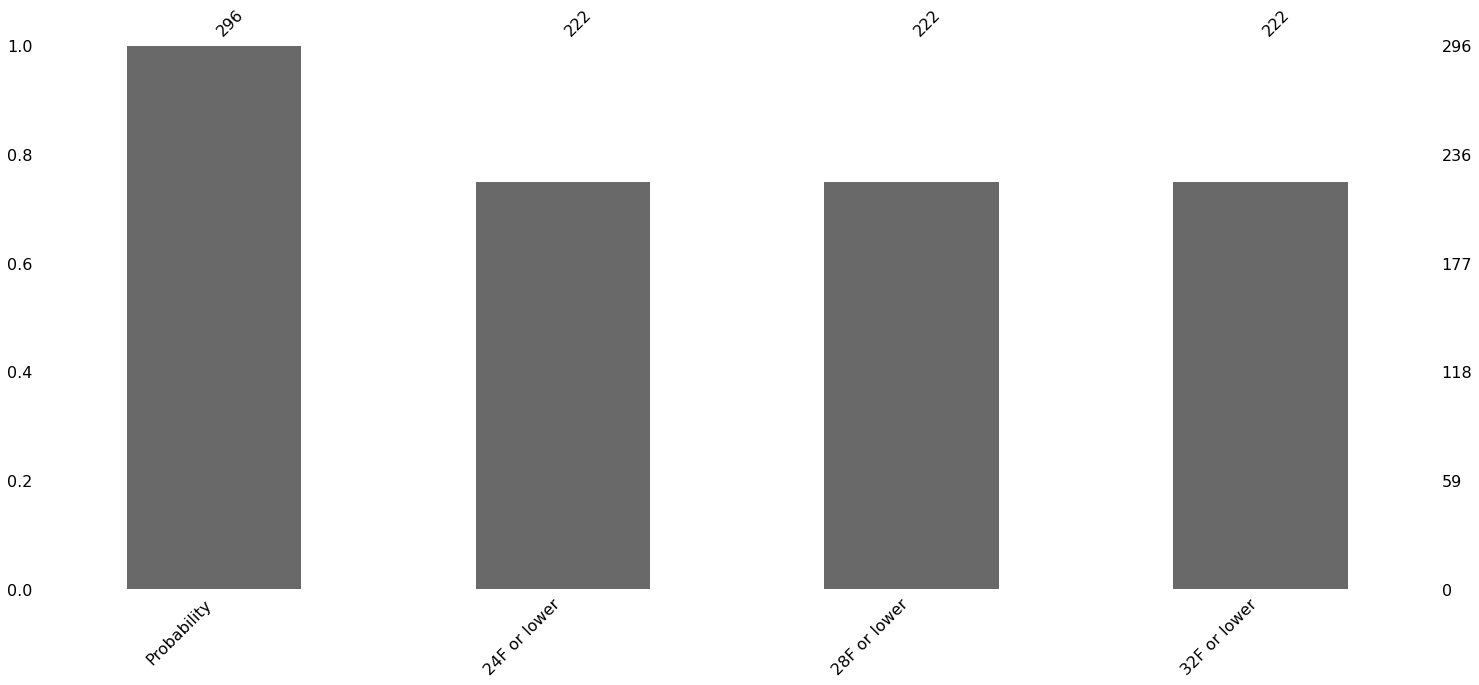

In [ ]:
#shows in a bar graph the NA values within the DataFrame
msno.bar(frost_data)

In [ ]:
#forward fill imputation method to fill in NA values
frost_data = frost_data.replace(["Insufficient data", np.nan])
frost_data.fillna(method = 'ffill', inplace=True)

frost_data

,Probability,24F or lower,28F or lower,32F or lower
0,Last freezing temperature in spring:,NaN,NaN,NaN
1,1 yr in 10 later than,May 4,May 17,May 27
2,2 yr in 10 later than,April 25,May 11,May 22
3,5 yr in 10 later than,April 7,April 29,May 12
4,First freezing temperature in fall:,April 7,April 29,May 12
...,...,...,...,...
3,5 yr in 10 later than,April 3,April 23,May 13
4,First freezing temperature in fall:,April 3,April 23,May 13
5,1 yr in 10 earlier than,October 12,October 3,September 21
6,2 yr in 10 earlier than,October 17,October 6,September 24


In [ ]:
frost_data['24F or lower'].dt.date

AttributeError: ignored

GROWTH DATA

In [ ]:
#growth data for each county in WA state
growth_file_names = ['ADAMS%20COUNTY.csv', 'ASOTIN%20COUNTY.csv', 'BENTON%20COUNTY.csv',
                     'CHELAN.csv', 'CLALLAM%20COUNTY.csv', 'CLARK%20COUNTY.csv', 'COLUMBIA%20COUNTY.csv',
                     'COWLITZ%20COUNTY.csv', 'DOUGLAS%20COUNTY.csv', 'FERRY%20COUNTY.csv', 'FRANKLIN%20COUNTY.csv',
                     'GARFIELD%20COUNTY.csv', 'GRANT%20COUNTY.csv', 'GRAYS%20HARBOR%20COUNTY.csv',
                     'ISLAND%20COUNTY.csv', 'JEFFERSON%20COUNTY.csv', 'KING%20COUNTY.csv', 'KITSAP%20COUNTY.csv',
                     'KITTITAS%20COUNTY.csv', 'KLICKITAT%20COUNTY.csv', 'LEWIS%20COUNTY.csv', 'LINCOLN%20COUNTY.csv',
                     'MASON%20COUNTY.csv', 'OKANOGAN%20COUNTY.csv', 'PACIFIC%20COUNTY.csv', 'PEND%20OREILLE%20COUNTY.csv',
                     'PIERCE%20COUNTY.csv', 'SAN%20JUAN%20COUNTY.csv', 'SKAGIT%20COUNTY.csv', 'SKAMANIA%20COUNTY.csv',
                     'SNOHOMISH%20COUNTY.csv', 'SPOKANE%20COUNTY.csv', 'STEVENS%20COUNTY.csv', 'THURSTON%20COUNTY.csv',
                     'WAHKIAKUM%20COUNTY.csv', 'WALLA%20WALLA%20COUNTY.csv', 'WHATCOM%20COUNTY.csv', 'WHITMAN%20COUNTY.csv','YAKIMA%20COUNTY.csv']

growth_data = pd.read_csv('https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Raw%20Data/Growth%20Data/ADAMS%20COUNTY.csv')
for name in growth_file_names:
  f = pd.read_csv('https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Raw%20Data/Growth%20Data/' + name)
  growth_data = pd.concat([growth_data, f])

In [ ]:
#shows the growth data of WA state with appropriate columns
growth_data.head()

,Probability,# days > 24F,# days > 28F,# days > 32F
0,9 years in 10,175,147,120
1,8 years in 10,189,157,129
2,5 years in 10,215,175,146
3,2 years in 10,241,194,163
4,1 year in 10,255,203,171


In [ ]:
#forward fill imputation method to fill in NA values
growth_data = growth_data.replace(['Insufficient data', np.nan])
growth_data = growth_data.replace(['No occurrence', np.nan])

growth_data.fillna(method = 'ffill', inplace=True)
growth_data

,Probability,# days > 24F,# days > 28F,# days > 32F
0,9 years in 10,175,147,120
1,8 years in 10,189,157,129
2,5 years in 10,215,175,146
3,2 years in 10,241,194,163
4,1 year in 10,255,203,171
...,...,...,...,...
0,9 years in 10,178,152,124
1,8 years in 10,188,160,129
2,5 years in 10,206,174,140
3,2 years in 10,225,188,151


In [ ]:
#shows the number of NA values within the DataFrame
growth_data.isna().sum()

Probability     0
# days > 24F    0
# days > 28F    0
# days > 32F    0
dtype: int64